In [14]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit #ShuffleSplitクラスの呼び出し
from sklearn import svm, metrics #svmとmetricsを呼び出す
from sklearn.metrics import plot_confusion_matrix #混同行列の呼び出し
from sklearn.model_selection import train_test_split # train_test_splitの読み込み
from sklearn.ensemble import RandomForestClassifier #ランダムフォレストを使うためのライブラリ
from sklearn.model_selection import LeaveOneOut #交差検証(LeaveOneOut)を使うためのライブラリ
from sklearn.model_selection import cross_val_score #交差検証に必要なライブラリ
from sklearn.model_selection import learning_curve, GridSearchCV

In [15]:
#emotion_labelデータの読みこみ

# data1_a_label_50 = pd.read_csv('emotion_label/A/emotion_A_20201111_1_50.csv')
# data1_a_label_60 = pd.read_csv('emotion_label/A/emotion_A_20201111_1_60.csv')
# data1_a_label_70 = pd.read_csv('emotion_label/A/emotion_A_20201111_1_70.csv')
# data1_a_label_80 = pd.read_csv('emotion_label/A/emotion_A_20201111_1_80.csv')

data2_a_label_50 = pd.read_csv('emotion_label/session2/A/emotion_A_20201111_2_50.csv')
data2_a_label_60 = pd.read_csv('emotion_label/session2/A/emotion_A_20201111_2_60.csv')
data2_a_label_70 = pd.read_csv('emotion_label/session2/A/emotion_A_20201111_2_70.csv')
data2_a_label_80 = pd.read_csv('emotion_label/session2/A/emotion_A_20201111_2_80.csv')

#feature_data(特徴量データーセット)の読みこみ
# data1_a_record_all_feature_50 = pd.read_csv('feature/A/data1_a_50_record_all_feature.csv')
# data1_a_record_all_feature_60 = pd.read_csv('feature/A/data1_a_60_record_all_feature.csv')
# data1_a_record_all_feature_70 = pd.read_csv('feature/A/data1_a_70_record_all_feature.csv')
# data1_a_record_all_feature_80 = pd.read_csv('feature/A/data1_a_80_record_all_feature.csv')

data2_a_record_all_feature_50 = pd.read_csv('feature/A/data2_a_50_record_all_feature.csv')
data2_a_record_all_feature_60 = pd.read_csv('feature/A/data2_a_60_record_all_feature.csv')
data2_a_record_all_feature_70 = pd.read_csv('feature/A/data2_a_70_record_all_feature.csv')
data2_a_record_all_feature_80 = pd.read_csv('feature/A/data2_a_80_record_all_feature.csv')

# feature_emg = pd.read_csv("feature_emg.csv")


In [16]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=1)
    return a

# data1_a_label_50 = dropna(data1_a_label_50)
# data1_a_label_60 = dropna(data1_a_label_60)
# data1_a_label_70 = dropna(data1_a_label_70)
# data1_a_label_80 = dropna(data1_a_label_80)

data2_a_label_50 = dropna(data2_a_label_50)
data2_a_label_60 = dropna(data2_a_label_60)
data2_a_label_70 = dropna(data2_a_label_70)
data2_a_label_80 = dropna(data2_a_label_80)

In [17]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=0)
    return a

# data1_a_label_50 = dropna(data1_a_label_50)
# data1_a_label_60 = dropna(data1_a_label_60)
# data1_a_label_70 = dropna(data1_a_label_70)
# data1_a_label_80 = dropna(data1_a_label_80)

data2_a_label_50 = dropna(data2_a_label_50)
data2_a_label_60 = dropna(data2_a_label_60)
data2_a_label_70 = dropna(data2_a_label_70)
data2_a_label_80 = dropna(data2_a_label_80)

In [18]:
#emotion_labelデータからtimeHMSとsubject列を消去

# data1_a_label_50 = data1_a_label_50.drop(["start_time", "finish_time"], axis=1)
# data1_a_label_60 = data1_a_label_60.drop(["start_time", "finish_time"], axis=1)
# data1_a_label_70 = data1_a_label_70.drop(["start_time", "finish_time"], axis=1)
# data1_a_label_80 = data1_a_label_80.drop(["start_time", "finish_time"], axis=1)

data2_a_label_50 = data2_a_label_50.drop(["start_time", "finish_time"], axis=1)
data2_a_label_60 = data2_a_label_60.drop(["start_time", "finish_time"], axis=1)
data2_a_label_70 = data2_a_label_70.drop(["start_time", "finish_time"], axis=1)
data2_a_label_80 = data2_a_label_80.drop(["start_time", "finish_time"], axis=1)

#確認
data2_a_label_80

,emotion_level
0,-2
1,-2
2,-2
3,-2
4,-2
...,...
419,-2
420,-2
421,-2
422,-2


In [19]:
#feature_dataとemotion_labelデータを連結
# data1_a_record_all_feature_50 = pd.concat([data1_a_record_all_feature_50, data1_a_label_50], axis=1, ignore_index=False)
# data1_a_record_all_feature_60 = pd.concat([data1_a_record_all_feature_60, data1_a_label_60], axis=1, ignore_index=False)
# data1_a_record_all_feature_70 = pd.concat([data1_a_record_all_feature_70, data1_a_label_70], axis=1, ignore_index=False)
# data1_a_record_all_feature_80 = pd.concat([data1_a_record_all_feature_80, data1_a_label_80], axis=1, ignore_index=False)

data2_a_record_all_feature_50 = pd.concat([data2_a_record_all_feature_50, data2_a_label_50], axis=1, ignore_index=False)
data2_a_record_all_feature_60 = pd.concat([data2_a_record_all_feature_60, data2_a_label_60], axis=1, ignore_index=False)
data2_a_record_all_feature_70 = pd.concat([data2_a_record_all_feature_70, data2_a_label_70], axis=1, ignore_index=False)
data2_a_record_all_feature_80 = pd.concat([data2_a_record_all_feature_80, data2_a_label_80], axis=1, ignore_index=False)

#データの確認(確認のためセッション1のAさんのデータを表示している)
display(data2_a_record_all_feature_80)

,start_time,finish_time,gyrx_mean,gyry_mean,gyrz_mean,gyrx_var,gyry_var,gyrz_var,gyrx_max,gyry_max,gyrz_max,gyrx_min,gyry_min,gyrz_min,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 15:15:26,2020-11-11 15:15:30,15.447,31.227,-22.915,3979.821191,65431.929471,3392.123775,273,1336,145,-177,-767,-287,1.174168,114.267170,-2
1,2020-11-11 15:15:27,2020-11-11 15:15:31,12.174,97.806,-16.283,3926.463724,85140.850364,3547.446911,285,1336,181,-190,-767,-251,0.782779,86.940697,-2
2,2020-11-11 15:15:28,2020-11-11 15:15:32,21.330,77.968,-26.278,4981.431100,123947.796976,4577.042716,352,1336,181,-190,-1505,-360,1.174168,84.342775,-2
3,2020-11-11 15:15:29,2020-11-11 15:15:33,22.550,40.783,-29.401,4687.617500,137426.809911,4396.614199,352,1086,181,-190,-1505,-360,1.174168,135.090332,-2
4,2020-11-11 15:15:30,2020-11-11 15:15:34,19.018,49.185,-26.634,4727.049676,134844.010775,4476.064044,352,1086,181,-190,-1505,-360,0.391389,146.038710,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,2020-11-11 15:29:50,2020-11-11 15:29:54,22.956,42.522,-27.508,1728.512064,58411.885516,3055.035936,163,945,145,-104,-797,-226,1.174168,88.251329,-2
420,2020-11-11 15:29:51,2020-11-11 15:29:55,21.695,54.193,-27.739,1915.049975,67788.891751,3271.440879,163,1244,267,-135,-797,-226,1.174168,65.250229,-2
421,2020-11-11 15:29:52,2020-11-11 15:29:56,20.961,27.404,-31.993,2308.777479,201901.938784,5444.190951,206,1439,322,-196,-3547,-336,0.782779,75.221671,-2
422,2020-11-11 15:29:53,2020-11-11 15:29:57,19.446,36.201,-28.432,2150.831084,195172.892599,5333.901376,206,1439,322,-196,-3547,-336,2.739726,38.596097,-2


In [20]:
data2_a_record_all_feature_80

,start_time,finish_time,gyrx_mean,gyry_mean,gyrz_mean,gyrx_var,gyry_var,gyrz_var,gyrx_max,gyry_max,gyrz_max,gyrx_min,gyry_min,gyrz_min,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 15:15:26,2020-11-11 15:15:30,15.447,31.227,-22.915,3979.821191,65431.929471,3392.123775,273,1336,145,-177,-767,-287,1.174168,114.267170,-2
1,2020-11-11 15:15:27,2020-11-11 15:15:31,12.174,97.806,-16.283,3926.463724,85140.850364,3547.446911,285,1336,181,-190,-767,-251,0.782779,86.940697,-2
2,2020-11-11 15:15:28,2020-11-11 15:15:32,21.330,77.968,-26.278,4981.431100,123947.796976,4577.042716,352,1336,181,-190,-1505,-360,1.174168,84.342775,-2
3,2020-11-11 15:15:29,2020-11-11 15:15:33,22.550,40.783,-29.401,4687.617500,137426.809911,4396.614199,352,1086,181,-190,-1505,-360,1.174168,135.090332,-2
4,2020-11-11 15:15:30,2020-11-11 15:15:34,19.018,49.185,-26.634,4727.049676,134844.010775,4476.064044,352,1086,181,-190,-1505,-360,0.391389,146.038710,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,2020-11-11 15:29:50,2020-11-11 15:29:54,22.956,42.522,-27.508,1728.512064,58411.885516,3055.035936,163,945,145,-104,-797,-226,1.174168,88.251329,-2
420,2020-11-11 15:29:51,2020-11-11 15:29:55,21.695,54.193,-27.739,1915.049975,67788.891751,3271.440879,163,1244,267,-135,-797,-226,1.174168,65.250229,-2
421,2020-11-11 15:29:52,2020-11-11 15:29:56,20.961,27.404,-31.993,2308.777479,201901.938784,5444.190951,206,1439,322,-196,-3547,-336,0.782779,75.221671,-2
422,2020-11-11 15:29:53,2020-11-11 15:29:57,19.446,36.201,-28.432,2150.831084,195172.892599,5333.901376,206,1439,322,-196,-3547,-336,2.739726,38.596097,-2


In [21]:
len(data2_a_record_all_feature_80)

424

In [22]:
#時間でデータを切り出している
#38→上から37行目までを抜き出している
# data1_a_50_record_all_feature_1 = data1_a_record_all_feature_50.iloc[0:38]
# data1_a_50_record_all_feature_2 = data1_a_record_all_feature_50.iloc[38:471]
# data1_a_50_record_all_feature_3 = data1_a_record_all_feature_50.iloc[471:687]

# data1_a_60_record_all_feature_1 = data1_a_record_all_feature_60.iloc[0:38]
# data1_a_60_record_all_feature_2 = data1_a_record_all_feature_60.iloc[38:471]
# data1_a_60_record_all_feature_3 = data1_a_record_all_feature_60.iloc[471:687]

# data1_a_70_record_all_feature_1 = data1_a_record_all_feature_70.iloc[0:38]
# data1_a_70_record_all_feature_2 = data1_a_record_all_feature_70.iloc[38:471]
# data1_a_70_record_all_feature_3 = data1_a_record_all_feature_70.iloc[471:687]

# data1_a_80_record_all_feature_1 = data1_a_record_all_feature_80.iloc[0:38]
# data1_a_80_record_all_feature_2 = data1_a_record_all_feature_80.iloc[38:471]
# data1_a_80_record_all_feature_3 = data1_a_record_all_feature_80.iloc[471:687]


data2_a_50_record_all_feature_1 = data2_a_record_all_feature_50.iloc[0:181]
data2_a_50_record_all_feature_2 = data2_a_record_all_feature_50.iloc[181:362]
data2_a_50_record_all_feature_3 = data2_a_record_all_feature_50.iloc[362:545]

data2_a_60_record_all_feature_1 = data2_a_record_all_feature_60.iloc[0:168]
data2_a_60_record_all_feature_2 = data2_a_record_all_feature_60.iloc[168:336]
data2_a_60_record_all_feature_3 = data2_a_record_all_feature_60.iloc[336:503]

data2_a_70_record_all_feature_1 = data2_a_record_all_feature_70.iloc[0:155]
data2_a_70_record_all_feature_2 = data2_a_record_all_feature_70.iloc[155:310]
data2_a_70_record_all_feature_3 = data2_a_record_all_feature_70.iloc[310:464]

data2_a_80_record_all_feature_1 = data2_a_record_all_feature_80.iloc[0:141]
data2_a_80_record_all_feature_2 = data2_a_record_all_feature_80.iloc[141:282]
data2_a_80_record_all_feature_3 = data2_a_record_all_feature_80.iloc[282:424]

In [23]:
# data2_a_50_record_all_feature_1 = data2_a_record_all_feature_50.iloc[0:38]
# data2_a_50_record_all_feature_2 = data2_a_record_all_feature_50.iloc[38:687]
# data2_a_50_record_all_feature_3 = data2_a_record_all_feature_50.iloc[471:687]

# data2_a_60_record_all_feature_1 = data2_a_record_all_feature_60.iloc[0:38]
# data2_a_60_record_all_feature_2 = data2_a_record_all_feature_60.iloc[38:687]
# data2_a_60_record_all_feature_3 = data2_a_record_all_feature_60.iloc[471:687]

# data2_a_70_record_all_feature_1 = data2_a_record_all_feature_70.iloc[0:38]
# data2_a_70_record_all_feature_2 = data2_a_record_all_feature_70.iloc[38:687]
# data2_a_70_record_all_feature_3 = data2_a_record_all_feature_70.iloc[471:687]

# data2_a_80_record_all_feature_1 = data2_a_record_all_feature_80.iloc[0:38]
# data2_a_80_record_all_feature_2 = data2_a_record_all_feature_80.iloc[38:687]
# data2_a_80_record_all_feature_3 = data2_a_record_all_feature_80.iloc[471:687]

In [24]:
# emotion_levelの列の数値によってlabelを振り分けている
# emotion_levelの列の数値が2より大きいときはpositive
# emotion_levelの列の数値が3より小さいときはother

def emotion_level_define(data_record_all_feature):
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] > 2, "label"] = "positive"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] <3, "label"] = "other"
    return data_record_all_feature

# data1_a_50_record_all_feature_1 = emotion_level_define(data1_a_50_record_all_feature_1)
# data1_a_50_record_all_feature_2 = emotion_level_define(data1_a_50_record_all_feature_2)
# data1_a_50_record_all_feature_3 = emotion_level_define(data1_a_50_record_all_feature_3)

# data1_a_60_record_all_feature_1 = emotion_level_define(data1_a_60_record_all_feature_1)
# data1_a_60_record_all_feature_2 = emotion_level_define(data1_a_60_record_all_feature_2)
# data1_a_60_record_all_feature_3 = emotion_level_define(data1_a_60_record_all_feature_3)

# data1_a_70_record_all_feature_1 = emotion_level_define(data1_a_70_record_all_feature_1)
# data1_a_70_record_all_feature_2 = emotion_level_define(data1_a_70_record_all_feature_2)
# data1_a_70_record_all_feature_3 = emotion_level_define(data1_a_70_record_all_feature_3)

# data1_a_80_record_all_feature_1 = emotion_level_define(data1_a_80_record_all_feature_1)
# data1_a_80_record_all_feature_2 = emotion_level_define(data1_a_80_record_all_feature_2)
# data1_a_80_record_all_feature_3 = emotion_level_define(data1_a_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_define(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_define(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_define(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_define(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_define(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_define(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_define(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_define(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_define(data2_a_70_record_all_feature_3)

data2_a_80_record_all_feature_1 = emotion_level_define(data2_a_80_record_all_feature_1)
data2_a_80_record_all_feature_2 = emotion_level_define(data2_a_80_record_all_feature_2)
data2_a_80_record_all_feature_3 = emotion_level_define(data2_a_80_record_all_feature_3)

C:\Users\shish\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\shish\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [25]:
#特徴量データからemotion_level列を消去
def emotion_level_drop(data_record_all_feature):
    data_record_all_feature.drop(["emotion_level"], axis=1, inplace=True)
    return data_record_all_feature


# data1_a_50_record_all_feature_1 = emotion_level_drop(data1_a_50_record_all_feature_1)
# data1_a_50_record_all_feature_2 = emotion_level_drop(data1_a_50_record_all_feature_2)
# data1_a_50_record_all_feature_3 = emotion_level_drop(data1_a_50_record_all_feature_3)

# data1_a_60_record_all_feature_1 = emotion_level_drop(data1_a_60_record_all_feature_1)
# data1_a_60_record_all_feature_2 = emotion_level_drop(data1_a_60_record_all_feature_2)
# data1_a_60_record_all_feature_3 = emotion_level_drop(data1_a_60_record_all_feature_3)

# data1_a_70_record_all_feature_1 = emotion_level_drop(data1_a_70_record_all_feature_1)
# data1_a_70_record_all_feature_2 = emotion_level_drop(data1_a_70_record_all_feature_2)
# data1_a_70_record_all_feature_3 = emotion_level_drop(data1_a_70_record_all_feature_3)

# data1_a_80_record_all_feature_1 = emotion_level_drop(data1_a_80_record_all_feature_1)
# data1_a_80_record_all_feature_2 = emotion_level_drop(data1_a_80_record_all_feature_2)
# data1_a_80_record_all_feature_3 = emotion_level_drop(data1_a_80_record_all_feature_3)

data2_a_50_record_all_feature_1 = emotion_level_drop(data2_a_50_record_all_feature_1)
data2_a_50_record_all_feature_2 = emotion_level_drop(data2_a_50_record_all_feature_2)
data2_a_50_record_all_feature_3 = emotion_level_drop(data2_a_50_record_all_feature_3)

data2_a_60_record_all_feature_1 = emotion_level_drop(data2_a_60_record_all_feature_1)
data2_a_60_record_all_feature_2 = emotion_level_drop(data2_a_60_record_all_feature_2)
data2_a_60_record_all_feature_3 = emotion_level_drop(data2_a_60_record_all_feature_3)

data2_a_70_record_all_feature_1 = emotion_level_drop(data2_a_70_record_all_feature_1)
data2_a_70_record_all_feature_2 = emotion_level_drop(data2_a_70_record_all_feature_2)
data2_a_70_record_all_feature_3 = emotion_level_drop(data2_a_70_record_all_feature_3)

data2_a_80_record_all_feature_1 = emotion_level_drop(data2_a_80_record_all_feature_1)
data2_a_80_record_all_feature_2 = emotion_level_drop(data2_a_80_record_all_feature_2)
data2_a_80_record_all_feature_3 = emotion_level_drop(data2_a_80_record_all_feature_3)

C:\Users\shish\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
data2_a_50_record_all_feature_1

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accx_min,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak
0,2020-11-11 15:15:10,2020-11-11 15:15:14,6486.074,1776.824,-7577.950,35.461,-82.771,-12.776,81803.344524,8549.315024,...,4970,1557,-8840,-665,-7304,-659,9.001957,122.867240,2.348337,597.483373
1,2020-11-11 15:15:11,2020-11-11 15:15:15,6413.464,1748.613,-7641.666,41.576,104.271,-31.387,36274.960704,4895.439231,...,4970,1557,-8840,-433,-1926,-659,8.610568,61.267628,0.391389,369.979335
2,2020-11-11 15:15:23,2020-11-11 15:15:27,6678.698,1678.252,-7432.191,21.126,9.633,-31.602,17583.482796,1775.296496,...,6400,1547,-8015,-226,-962,-379,7.827789,67.567721,0.391389,144.797729
3,2020-11-11 15:15:24,2020-11-11 15:15:28,6625.818,1682.904,-7479.458,21.091,22.898,-34.053,13756.874876,1779.386784,...,6378,1547,-8015,-226,-962,-379,7.827789,63.175142,0.782779,144.348261
4,2020-11-11 15:15:25,2020-11-11 15:15:29,6585.332,1688.401,-7515.517,21.096,17.128,-34.625,6752.361776,1485.486199,...,6378,1574,-8015,-177,-962,-379,7.827789,46.782133,0.782779,149.596783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2020-11-11 15:20:11,2020-11-11 15:20:15,5273.602,1453.788,-8515.016,23.854,-4.668,-29.449,26284.991596,2030.199056,...,4918,1264,-8979,-183,-1767,-452,7.436399,75.393129,0.391389,152.691227
177,2020-11-11 15:20:12,2020-11-11 15:20:16,5237.955,1454.471,-8538.387,18.017,64.690,-21.360,25332.932975,1519.475159,...,4889,1264,-9138,-208,-968,-421,9.001957,64.008747,0.782779,135.113015
178,2020-11-11 15:20:13,2020-11-11 15:20:17,5285.281,1453.826,-8507.266,19.833,67.120,-29.532,28083.240039,1616.907724,...,4889,1264,-9138,-208,-1163,-421,9.001957,45.696890,0.782779,158.110732
179,2020-11-11 15:20:14,2020-11-11 15:20:18,5232.539,1455.591,-8540.095,22.633,-46.677,-29.392,36946.466479,1797.713719,...,4616,1264,-9279,-208,-1163,-421,8.610568,51.467723,1.174168,143.190642


In [27]:
#全データからpositiveの数を確認
# data1_a_50_record_all_feature_positive_1 = data1_a_50_record_all_feature_1[data1_a_50_record_all_feature_1.label == "positive"]
# data1_a_50_record_all_feature_positive_1 = data1_a_50_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_positive_1))

# data1_a_50_record_all_feature_positive_2 = data1_a_50_record_all_feature_2[data1_a_50_record_all_feature_2.label == "positive"]
# data1_a_50_record_all_feature_positive_2 = data1_a_50_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_positive_2))

# data1_a_50_record_all_feature_positive_3 = data1_a_50_record_all_feature_3[data1_a_50_record_all_feature_3.label == "positive"]
# data1_a_50_record_all_feature_positive_3 = data1_a_50_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_positive_3))

# data1_a_60_record_all_feature_positive_1 = data1_a_60_record_all_feature_1[data1_a_60_record_all_feature_1.label == "positive"]
# data1_a_60_record_all_feature_positive_1 = data1_a_60_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_positive_1))

# data1_a_60_record_all_feature_positive_2 = data1_a_60_record_all_feature_2[data1_a_60_record_all_feature_2.label == "positive"]
# data1_a_60_record_all_feature_positive_2 = data1_a_60_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_positive_2))

# data1_a_60_record_all_feature_positive_3 = data1_a_60_record_all_feature_3[data1_a_60_record_all_feature_3.label == "positive"]
# data1_a_60_record_all_feature_positive_3 = data1_a_60_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_positive_3))

# data1_a_70_record_all_feature_positive_1 = data1_a_70_record_all_feature_1[data1_a_70_record_all_feature_1.label == "positive"]
# data1_a_670_record_all_feature_positive_1 = data1_a_70_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_positive_1))

# data1_a_70_record_all_feature_positive_2 = data1_a_70_record_all_feature_2[data1_a_70_record_all_feature_2.label == "positive"]
# data1_a_70_record_all_feature_positive_2 = data1_a_70_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_positive_2))

# data1_a_70_record_all_feature_positive_3 = data1_a_70_record_all_feature_3[data1_a_70_record_all_feature_3.label == "positive"]
# data1_a_70_record_all_feature_positive_3 = data1_a_70_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_positive_3))

# data1_a_80_record_all_feature_positive_1 = data1_a_80_record_all_feature_1[data1_a_80_record_all_feature_1.label == "positive"]
# data1_a_80_record_all_feature_positive_1 = data1_a_80_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_positive_1))

# data1_a_80_record_all_feature_positive_2 = data1_a_80_record_all_feature_2[data1_a_80_record_all_feature_2.label == "positive"]
# data1_a_80_record_all_feature_positive_2 = data1_a_80_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_positive_2))

# data1_a_80_record_all_feature_positive_3 = data1_a_80_record_all_feature_3[data1_a_80_record_all_feature_3.label == "positive"]
# data1_a_80_record_all_feature_positive_3 = data1_a_80_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_positive_3))

In [29]:
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "positive"]
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_1))

# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "positive"]
# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_2))

# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "positive"]
# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_3))

# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "positive"]
# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_1))

# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "positive"]
# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_2))

# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "positive"]
# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_3))

# data2_a_70_record_all_feature_positive_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "positive"]
# data2_a_70_record_all_feature_positive_1 = data2_a_70_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_1))

# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "positive"]
# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_2))

# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "positive"]
# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_3))

data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_1[data2_a_80_record_all_feature_1.label == "positive"]
data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_a_80_record_all_feature_positive_1))

data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "positive"]
data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_a_80_record_all_feature_positive_2))

data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "positive"]
data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_a_80_record_all_feature_positive_3))

69
64
68


In [30]:
# #全データからotherの数を確認
# data1_a_50_record_all_feature_other_1 = data1_a_50_record_all_feature_1[data1_a_50_record_all_feature_1.label == "other"]
# data1_a_50_record_all_feature_other_1 = data1_a_50_record_all_feature_other_1.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_other_1))

# data1_a_50_record_all_feature_other_2 = data1_a_50_record_all_feature_2[data1_a_50_record_all_feature_2.label == "other"]
# data1_a_50_record_all_feature_other_2 = data1_a_50_record_all_feature_other_2.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_other_2))

# data1_a_50_record_all_feature_other_3 = data1_a_50_record_all_feature_3[data1_a_50_record_all_feature_3.label == "other"]
# data1_a_50_record_all_feature_other_3 = data1_a_50_record_all_feature_other_3.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_other_3))

# data1_a_60_record_all_feature_other_2 = data1_a_60_record_all_feature_2[data1_a_60_record_all_feature_2.label == "other"]
# data1_a_60_record_all_feature_other_2 = data1_a_60_record_all_feature_other_2.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_other_2))

# data1_a_60_record_all_feature_other_3 = data1_a_60_record_all_feature_3[data1_a_60_record_all_feature_3.label == "other"]
# data1_a_60_record_all_feature_other_3 = data1_a_60_record_all_feature_other_3.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_other_3))

# data1_a_60_record_all_feature_other_1 = data1_a_60_record_all_feature_1[data1_a_60_record_all_feature_1.label == "other"]
# data1_a_60_record_all_feature_other_1 = data1_a_60_record_all_feature_other_1.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_other_1))

# data1_a_70_record_all_feature_other_2 = data1_a_70_record_all_feature_2[data1_a_70_record_all_feature_2.label == "other"]
# data1_a_70_record_all_feature_other_2 = data1_a_70_record_all_feature_other_2.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_other_2))

# data1_a_70_record_all_feature_other_3 = data1_a_70_record_all_feature_3[data1_a_70_record_all_feature_3.label == "other"]
# data1_a_70_record_all_feature_other_3 = data1_a_70_record_all_feature_other_3.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_other_3))

# data1_a_70_record_all_feature_other_1 = data1_a_70_record_all_feature_1[data1_a_70_record_all_feature_1.label == "other"]
# data1_a_70_record_all_feature_other_1 = data1_a_70_record_all_feature_other_1.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_other_1))

# data1_a_80_record_all_feature_other_2 = data1_a_80_record_all_feature_2[data1_a_80_record_all_feature_2.label == "other"]
# data1_a_80_record_all_feature_other_2 = data1_a_80_record_all_feature_other_2.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_other_2))

# data1_a_80_record_all_feature_other_3 = data1_a_80_record_all_feature_3[data1_a_80_record_all_feature_3.label == "other"]
# data1_a_80_record_all_feature_other_3 = data1_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_other_3))

# data1_a_80_record_all_feature_other_3 = data1_a_80_record_all_feature_3[data1_a_80_record_all_feature_3.label == "other"]
# data1_a_80_record_all_feature_other_3 = data1_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_other_3))

In [266]:
# 

In [267]:
data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "other"]
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_1))

# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "other"]
# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_2))

# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "other"]
# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "other"]
# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_2))

# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "other"]
# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "other"]
# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_1))

# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "other"]
# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_2))

# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "other"]
# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_3))

# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "other"]
# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_1))

# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "other"]
# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_2))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

# data2_a_80_record_all_feature_other_1 = data2_a_80_record_all_feature_1[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_1 = data2_a_80_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_1))

In [268]:
#ここから

In [269]:
#学習データとテストデータに分ける

train_data = pd.concat([data2_a_50_record_all_feature_1, data2_a_50_record_all_feature_2], ignore_index=True)
test_data = data2_a_50_record_all_feature_3
# train_data = pd.concat([data2_a_60_record_all_feature_1, data2_a_60_record_all_feature_2], ignore_index=True)
# test_data = data2_a_60_record_all_feature_3
# train_data = pd.concat([data2_a_70_record_all_feature_1, data2_a_70_record_all_feature_2], ignore_index=True)
# test_data = data2_a_70_record_all_feature_3
# train_data = pd.concat([data2_a_80_record_all_feature_1, data2_a_80_record_all_feature_2], ignore_index=True)
# test_data = data2_a_80_record_all_feature_3

X_train = train_data.iloc[0:,2:16]
y_train = train_data.label

X_test = test_data.iloc[0:,2:16]
y_test = test_data.label

# X_train = train_data.iloc[0:,2:28]
# y_train = test_data.iloc[0:,2:28]

# X_test = train_data.label
# y_test = test_data.label

In [270]:
# random = RandomForestClassifier(random_state=42)
# loo=LeaveOneOut()

# score = cross_val_score(random, X, y, cv = 5)
# print(score.mean())
# print(score)

正答率0.5563380281690141
誤った個数：63
classification report
              precision    recall  f1-score   support

       other       0.54      0.91      0.68        74
    positive       0.63      0.18      0.28        68

    accuracy                           0.56       142
   macro avg       0.59      0.54      0.48       142
weighted avg       0.59      0.56      0.49       142

Confusion matrix, without normalization
[[67  7]
 [56 12]]


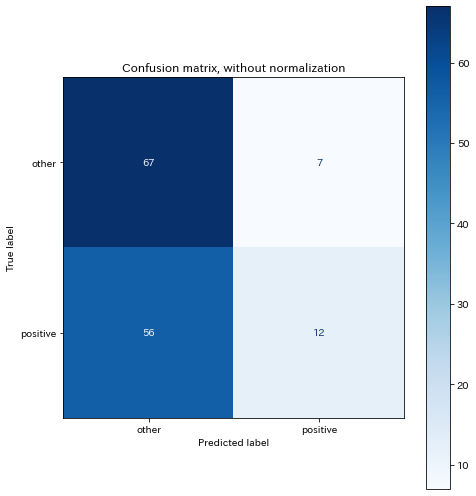

Normalized confusion matrix
[[0.90540541 0.09459459]
 [0.82352941 0.17647059]]


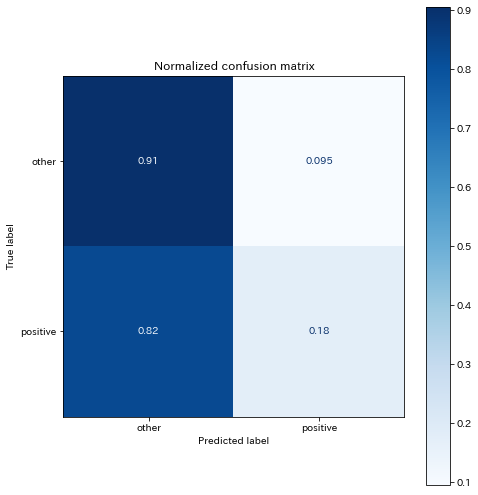

In [271]:
random = RandomForestClassifier(random_state=42)
# random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 2, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
random.fit(X_train, y_train)

level_names = ["other", "positive"]

# モデルの学習結果を評価する
accuracy = random.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = random.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))

#混同行列の作成
class_names = level_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.rcParams["figure.figsize"] = (7, 7)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.tight_layout()
    plt.show()

# 特徴量選択

In [272]:
other = "0"
positive = "1"

X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index(drop=True)

X_train_time = data2_a_record_all_feature_50.iloc[0:362]
# X_train_time = data2_a_record_all_feature_60.iloc[0:336]
# X_train_time = data2_a_record_all_feature_70.iloc[0:310]
# X_train_time = data2_a_record_all_feature_80.iloc[0:282]

X_train_time = X_train_time.iloc[0:,0:2]
X_train_time = X_train_time.reset_index(drop=True)
X_train_time = pd.concat([X_train_time, y_train], axis=1)
X_train_time.columns = ["start", "finish", "emotion_level"]
X_train_time.loc[X_train_time["emotion_level"] == "other", "label"] = 0
X_train_time.loc[X_train_time["emotion_level"] == "positive", "label"] = 1
X_train_time

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)

y_test_time = data2_a_record_all_feature_50.iloc[362:545]
# y_test_time = data2_a_record_all_feature_60.iloc[336:503]
# y_test_time = data2_a_record_all_feature_70.iloc[310:464]
# y_test_time = data2_a_record_all_feature_80.iloc[282:424]

y_test_time = y_test_time.iloc[0:,0:2]
y_test_time = y_test_time.reset_index(drop=True)
y_test_time = pd.concat([y_test_time, y_test], axis=1)
y_test_time.columns = ["start", "finish", "emotion_level"]
y_test_time.loc[y_test_time["emotion_level"] == "other", "label"] = 0
y_test_time.loc[y_test_time["emotion_level"] == "positive", "label"] = 1
y_test_time

predicted = pd.DataFrame(predicted)

predict_time = data2_a_record_all_feature_50.iloc[362:545]
# predict_time = data2_a_record_all_feature_60.iloc[336:503]
# predict_time = data2_a_record_all_feature_70.iloc[310:464]
# predict_time = data2_a_record_all_feature_80.iloc[282:424]

predict_time = predict_time.iloc[0:,0:2]
predict_time = predict_time.reset_index(drop=True)
predict_time = pd.concat([predict_time, predicted], axis=1)
predict_time.columns = ["start", "finish", "emotion_level"]
predict_time.loc[predict_time["emotion_level"] == "other", "label"] = 0
predict_time.loc[predict_time["emotion_level"] == "positive", "label"] = 1
predict_time

,start,finish,emotion_level,label
0,2020-11-11 15:25:15,2020-11-11 15:25:19,other,0.0
1,2020-11-11 15:25:16,2020-11-11 15:25:20,other,0.0
2,2020-11-11 15:25:17,2020-11-11 15:25:21,other,0.0
3,2020-11-11 15:25:18,2020-11-11 15:25:22,other,0.0
4,2020-11-11 15:25:19,2020-11-11 15:25:23,other,0.0
...,...,...,...,...
137,2020-11-11 15:29:50,2020-11-11 15:29:54,other,0.0
138,2020-11-11 15:29:51,2020-11-11 15:29:55,other,0.0
139,2020-11-11 15:29:52,2020-11-11 15:29:56,other,0.0
140,2020-11-11 15:29:53,2020-11-11 15:29:57,other,0.0


In [273]:
y_test_time

,start,finish,emotion_level,label
0,2020-11-11 15:25:15,2020-11-11 15:25:19,positive,1.0
1,2020-11-11 15:25:16,2020-11-11 15:25:20,positive,1.0
2,2020-11-11 15:25:17,2020-11-11 15:25:21,positive,1.0
3,2020-11-11 15:25:18,2020-11-11 15:25:22,positive,1.0
4,2020-11-11 15:25:19,2020-11-11 15:25:23,positive,1.0
...,...,...,...,...
137,2020-11-11 15:29:50,2020-11-11 15:29:54,other,0.0
138,2020-11-11 15:29:51,2020-11-11 15:29:55,other,0.0
139,2020-11-11 15:29:52,2020-11-11 15:29:56,other,0.0
140,2020-11-11 15:29:53,2020-11-11 15:29:57,other,0.0


In [274]:
test = pd.concat([X_train_time, y_test_time], ignore_index=True, axis=0)
predicted = predict_time

In [275]:
test["start"] = pd.to_datetime(test['start'])
predicted["start"] = pd.to_datetime(predicted['start'])

test.set_index("start", inplace=True)
predicted.set_index("start", inplace=True)

In [276]:
test

,finish,emotion_level,label
start,,,
2020-11-11 15:15:26,2020-11-11 15:15:30,other,0.0
2020-11-11 15:15:27,2020-11-11 15:15:31,other,0.0
2020-11-11 15:15:28,2020-11-11 15:15:32,other,0.0
2020-11-11 15:15:29,2020-11-11 15:15:33,other,0.0
2020-11-11 15:15:30,2020-11-11 15:15:34,other,0.0
...,...,...,...
2020-11-11 15:29:50,2020-11-11 15:29:54,other,0.0
2020-11-11 15:29:51,2020-11-11 15:29:55,other,0.0
2020-11-11 15:29:52,2020-11-11 15:29:56,other,0.0


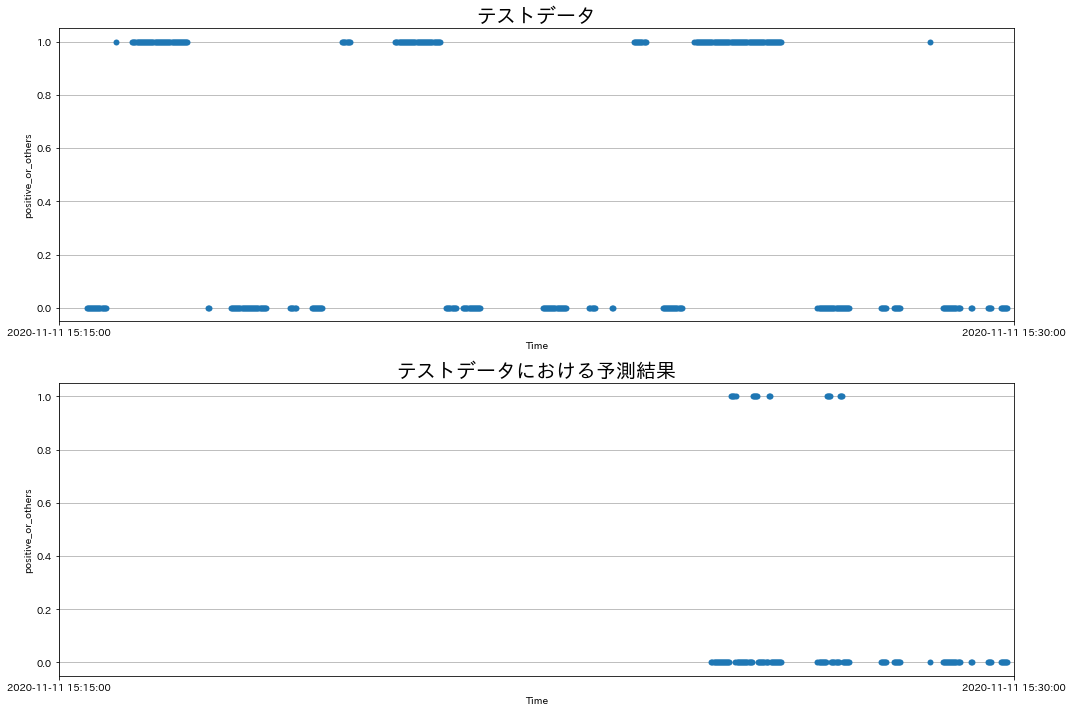

In [277]:
import datetime
import matplotlib.dates as mdates
import japanize_matplotlib

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(test.index, test["label"], marker="o", markeredgewidth=0,linewidth=0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax1.set_xlim(datetime.datetime(2020,11,11,15,15,0), datetime.datetime(2020,11,11,15,30,0))
# ax1.set_ylim(0, 1)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax1.set_title("テストデータ", fontsize=20)
ax1.set_xlabel("Time")
ax1.set_ylabel("positive_or_others")
ax1.grid(True)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(predicted.index, predicted["label"], marker="o", markeredgewidth=0,linewidth=0)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax2.set_xlim(datetime.datetime(2020,11,11,15,15,0), datetime.datetime(2020,11,11,15,30,0))
ax2.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax2.set_title("テストデータにおける予測結果", fontsize=20)
ax2.set_xlabel("Time")
ax2.set_ylabel("positive_or_others")
ax2.grid(True)


plt.tight_layout()